          PM2.5      PM10       NO2       NH3       SO2        CO     OZONE  \
PM2.5  1.000000  0.847821  0.452296  0.514462  0.127736  0.349025 -0.131209   
PM10   0.847821  1.000000  0.507776  0.501298  0.099759  0.330761 -0.158430   
NO2    0.452296  0.507776  1.000000  0.391747  0.027716  0.149404 -0.113338   
NH3    0.514462  0.501298  0.391747  1.000000  0.043533  0.209216 -0.228292   
SO2    0.127736  0.099759  0.027716  0.043533  1.000000  0.087520  0.023599   
CO     0.349025  0.330761  0.149404  0.209216  0.087520  1.000000 -0.144244   
OZONE -0.131209 -0.158430 -0.113338 -0.228292  0.023599 -0.144244  1.000000   
AQI    0.985440  0.872710  0.463397  0.519951  0.125297  0.375208 -0.137347   

            AQI  
PM2.5  0.985440  
PM10   0.872710  
NO2    0.463397  
NH3    0.519951  
SO2    0.125297  
CO     0.375208  
OZONE -0.137347  
AQI    1.000000  
             PM2.5         PM10          NO2          NH3          SO2  \
count  1565.000000  1565.000000  1565.000000  1565.0

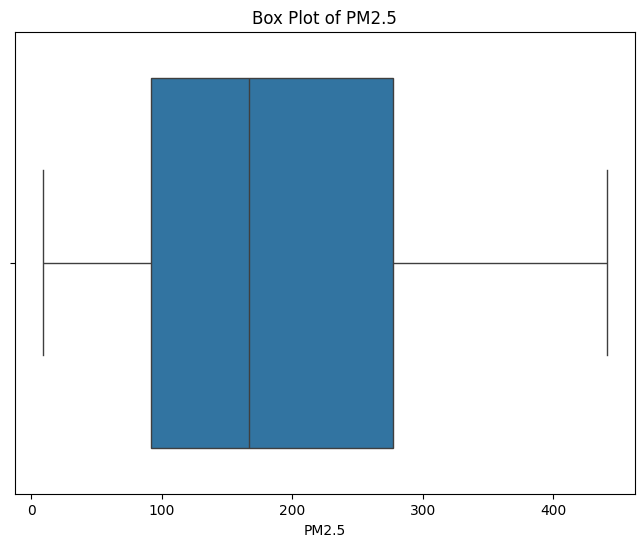

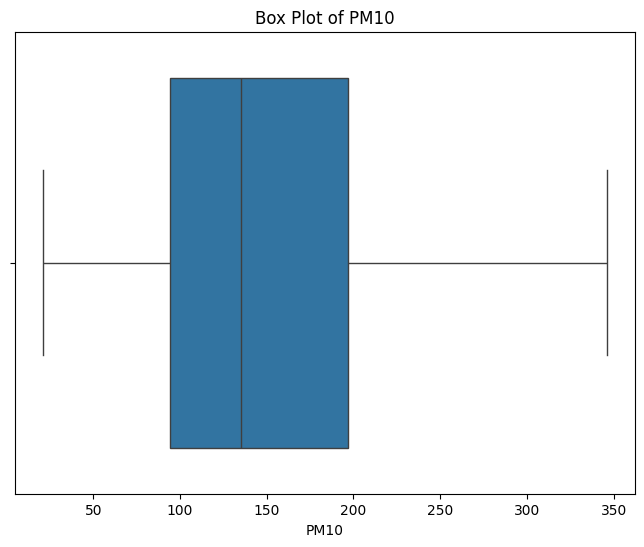

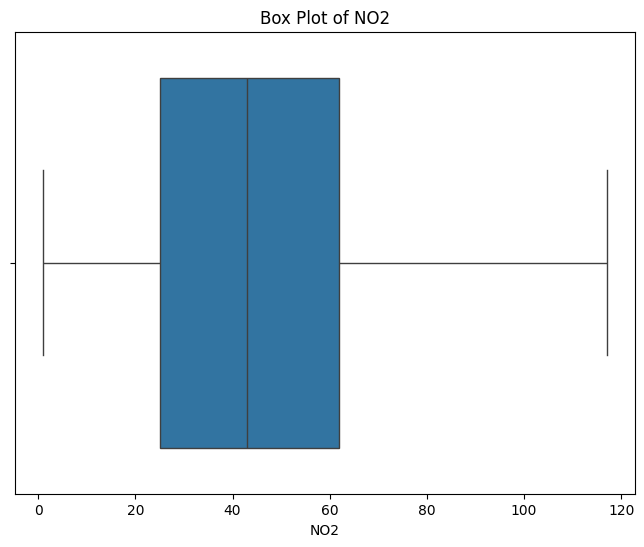

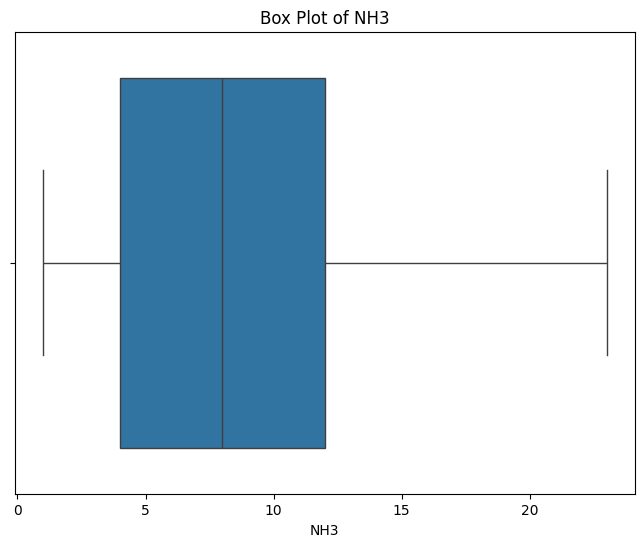

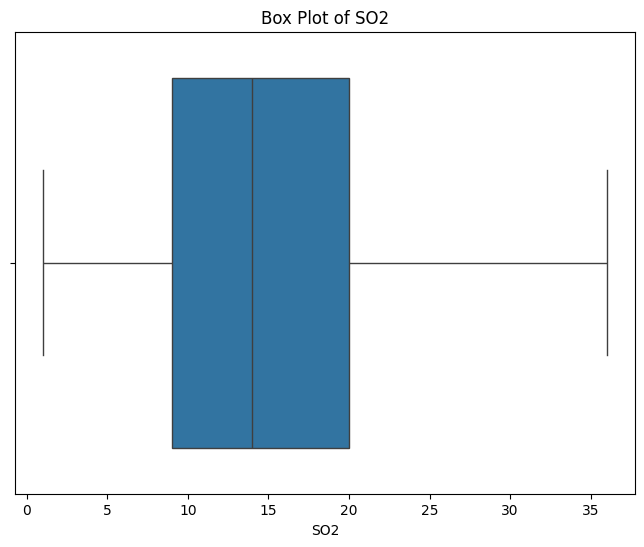

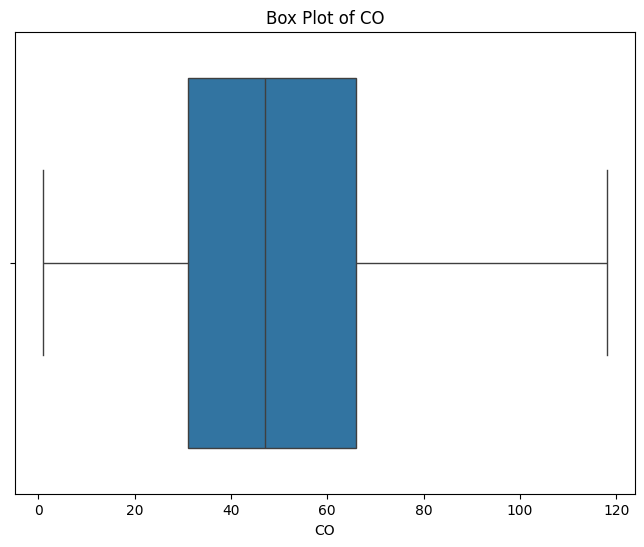

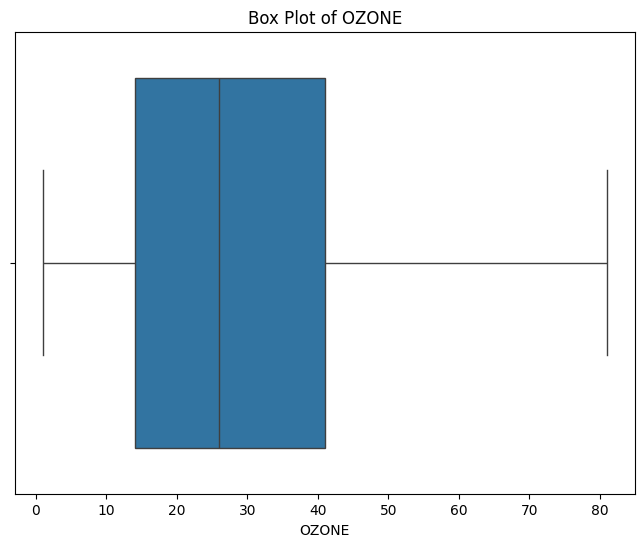

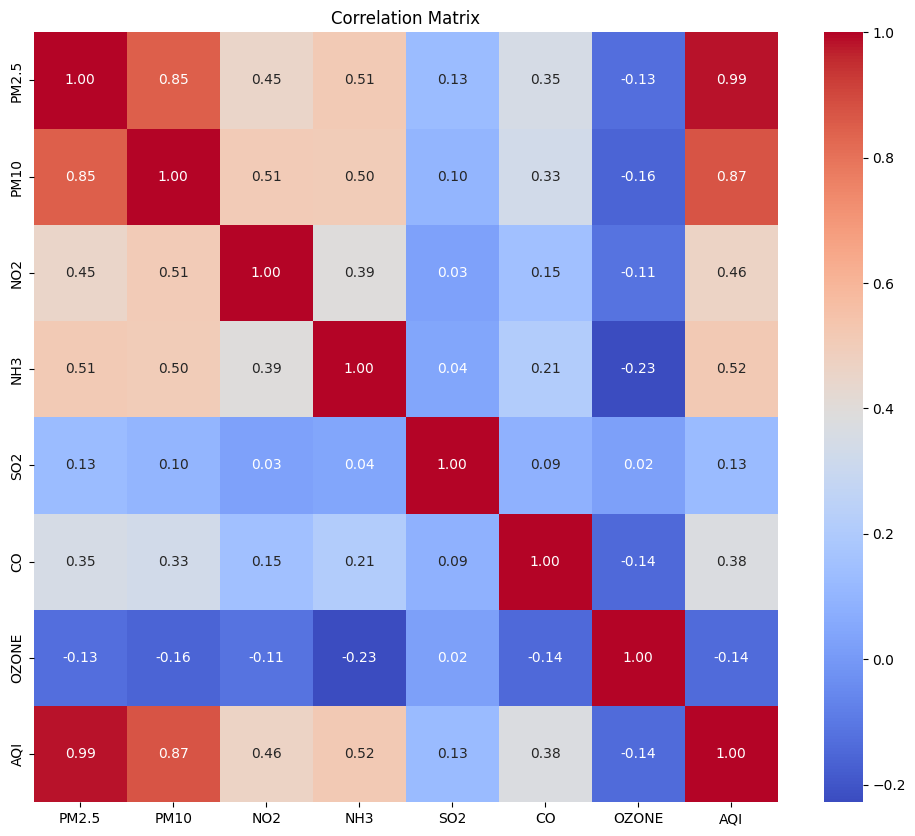

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = pd.read_csv('AQI Dataset.csv')
#Removing non numeric columns
relevant_columns = ['PM2.5','PM10','NO2','NH3','SO2','CO','OZONE','AQI'
]

# Filter the dataframe to include only relevant columns
df_relevant = df[relevant_columns]

# Select independent and dependent variables
independent_vars = ['PM2.5','PM10','NO2','NH3','SO2','CO','OZONE']
dependent_var=['AQI']
X = df[independent_vars]
y = df[dependent_var]

# Calculate Pearson correlation
correlation_matrix = df_relevant.corr()
print(correlation_matrix)


# Descriptive statistics for numeric columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Create box plots for each independent variable without outliers
for var in independent_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[var], showfliers=False)
    plt.title(f'Box Plot of {var}')
    plt.xlabel(var)
    plt.show()

# Visualize correlations using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_relevant.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()




In [ ]:
#Building model
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Read dataset
df = pd.read_csv('AQI Dataset.csv')

# Select independent and dependent variables
independent_vars = ['PM2.5','PM10','NO2','NH3','SO2','CO','OZONE']
dependent_var=['AQI']
X = df[independent_vars]
y = df[dependent_var]

# Drop rows with missing values
df.dropna(inplace=True)

# Reassign X and y after dropping missing values
X = df[independent_vars]
y = df['AQI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant term to the independent variables for the training set
X_train = sm.add_constant(X_train)

# Fit the OLS model on the training data
model = sm.OLS(y_train, X_train).fit()

# Add a constant term to the independent variables for the testing set
X_test = sm.add_constant(X_test)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Print the model summary
print(model.summary())

# Model Adequacy Testing

# Test for Normality of Residuals (Jarque-Bera test)
print("\nJarque-Bera test for normality of residuals:")
print(sm.stats.jarque_bera(model.resid))

# Test for Heteroscedasticity (Breusch-Pagan test)
print("\nBreusch-Pagan test for heteroscedasticity:")
print(sm.stats.het_breuschpagan(model.resid, model.model.exog))

# Test for Autocorrelation of Residuals (Durbin-Watson test)
print("\nDurbin-Watson test for autocorrelation of residuals:")
print(sm.stats.durbin_watson(model.resid))

# Test for Multicollinearity (Variance Inflation Factor)
print("\nVariance Inflation Factor (VIF) for multicollinearity:")
vif = pd.DataFrame()
vif["Variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

Mean Squared Error: 179.97572878951277
R^2 Score: 0.9809116218500654
                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     7169.
Date:                Sun, 21 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:06:47   Log-Likelihood:                -5204.0
No. Observations:                1252   AIC:                         1.042e+04
Df Residuals:                    1244   BIC:                         1.046e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

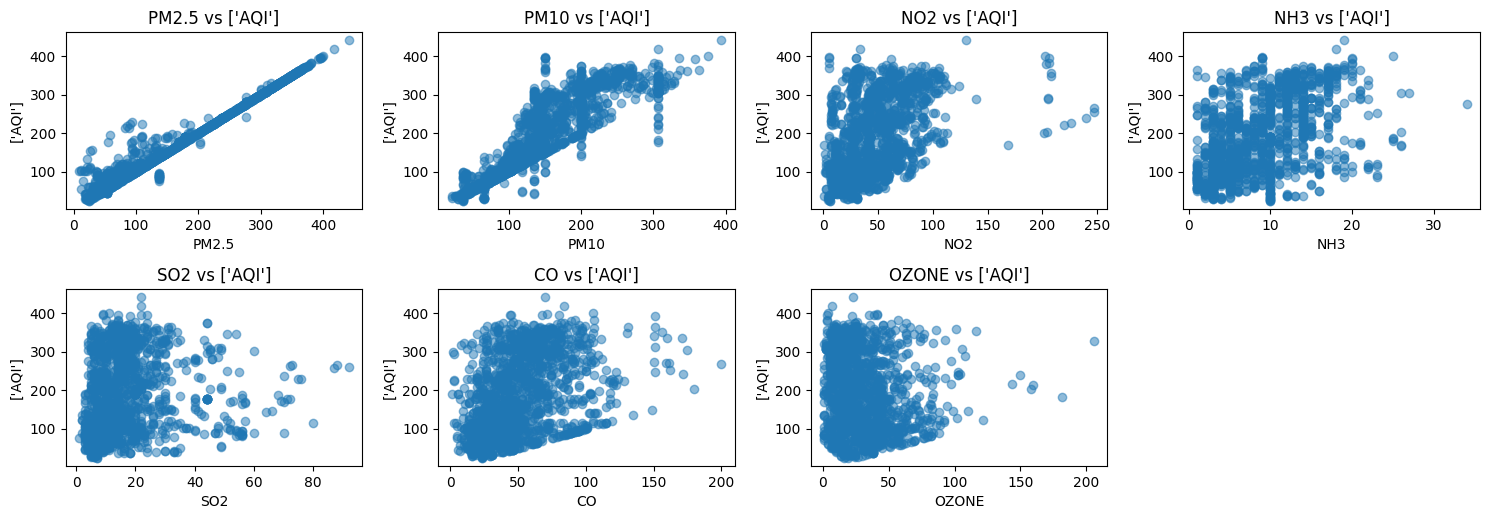

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Plot scatter plots
plt.figure(figsize=(15, 10))
for i, var in enumerate(independent_vars, 1):
    plt.subplot(4, 4, i)
    plt.scatter(df[var], df[dependent_var], alpha=0.5)
    plt.title(f'{var} vs {dependent_var}')
    plt.xlabel(var)
    plt.ylabel(dependent_var)
plt.tight_layout()
plt.show()

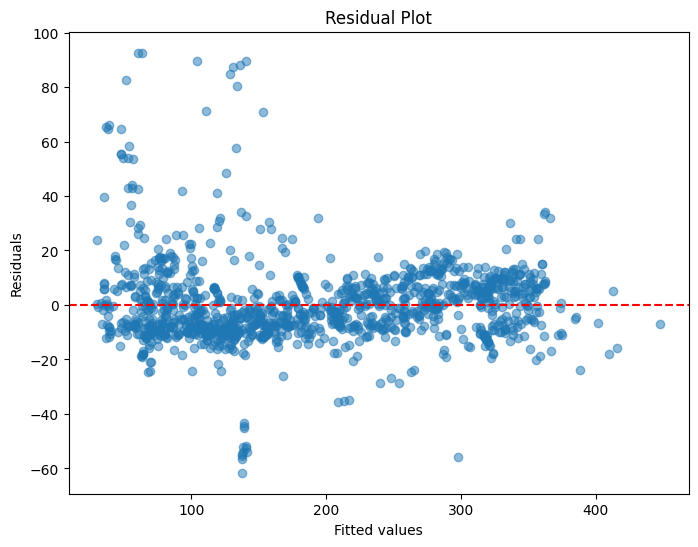

In [ ]:
# Calculate residuals
residuals = model.resid

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

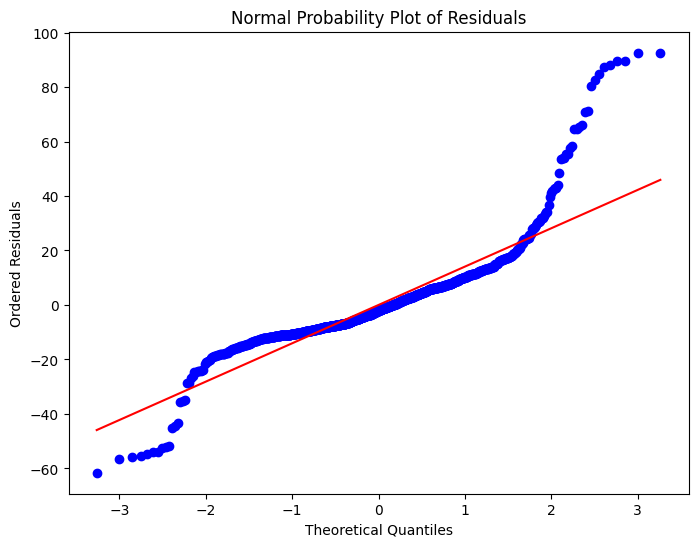

In [ ]:
import scipy.stats as stats
# Generate a normal probability plot of residuals
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Probability Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Residuals')
plt.show()
